https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

# <font color="#2086BA">1. Importing packages and Data</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from collections import OrderedDict

pd.options.display.max_columns = 150
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'
%matplotlib inline

In [2]:
folderPath = "D:/Rep/MyLearning/competitions/kaggle/CostoRiconHVP";

In [3]:
fileName = "train.csv"
df_train = pd.read_csv(os.path.join(folderPath,fileName))

In [4]:
fileName = "test.csv"
df_test = pd.read_csv(os.path.join(folderPath,fileName))

In [5]:
data = pd.concat([df_train,df_test])

In [6]:
data.head()

,Id,SQBage,SQBdependency,SQBedjefe,SQBescolari,SQBhogar_nin,SQBhogar_total,SQBmeaned,SQBovercrowding,Target,abastaguadentro,abastaguafuera,abastaguano,age,agesq,area1,area2,bedrooms,cielorazo,computer,coopele,dependency,dis,edjefa,edjefe,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,epared1,epared2,epared3,escolari,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,female,hacapo,hacdor,hhsize,hogar_adul,hogar_mayor,hogar_nin,hogar_total,idhogar,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,male,meaneduc,mobilephone,noelec,overcrowding,paredblolad,pareddes,paredfibras,paredmad,paredother,paredpreb,paredzinc,paredzocalo,parentesco1,parentesco10,parentesco11,parentesco12,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,pisocemento,pisomadera,pisomoscer,pisonatur,pisonotiene,pisoother,planpri,public,qmobilephone,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,refrig,rez_esc,rooms,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,tamhog,tamviv,techocane,techoentrepiso,techootro,techozinc,television,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1
0,ID_279628684,1849,0.0,100,100,0,1,100.0,1.000000,4.0,1,0,0,43,1849,1,0,1,1,0,0,no,0,no,10,1,0,0,0,0,0,0,0,1,0,0,1,0,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,21eb7fcc1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,10.0,1,0,1.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,NaN,3,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,NaN,190000.0
1,ID_f29eb3ddd,4489,64.0,144,144,0,1,144.0,1.000000,4.0,1,0,0,67,4489,1,0,1,1,0,0,8,0,no,12,1,0,0,0,0,0,0,1,0,0,0,1,0,12,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0e5d7a658,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,12.0,1,0,1.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,NaN,4,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1.0,135000.0
2,ID_68de51c94,8464,64.0,0,121,0,1,121.0,0.250000,4.0,1,0,0,92,8464,1,0,2,1,0,0,8,1,11,no,1,0,0,0,0,0,0,1,0,0,0,1,0,11,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,2c7317ea8,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,11.0,0,0,0.500000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,NaN,8,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,NaN,NaN
3,ID_d671db89c,289,1.0,121,81,4,16,121.0,1.777778,4.0,1,0,0,17,289,1,0,3,1,0,0,yes,0,no,11,1,0,0,0,0,0,0,1,0,0,0,0,1,9,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,4,2,0,2,4,2b58d945f,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,11.0,1,0,1.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0,2,2,1,1,2,1,3,4,1,1.0,5,0,1,0,0,0,4,4,0,0,0,1,0,0,0,1,0,0,1,1,1.0,180000.0
4,ID_d56d6f5f5,1369,1.0,121,121,4,16,121.0,1.777778,4.0,1,0,0,37,1369,1,0,3,1,0,0,yes,0,no,11,1,0,0,0,0,0,0,1,0,0,0,0,1,11,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,4,2,0,2,4,2b58d945f,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,11.0,1,0,1.333333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0,2,2,1,1,2,1,3,4,1,NaN,5,0,1,0,0,0,4,4,0,0,0,1,0,0,0,1,0,0,1,1,1.0,180000.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33413 entries, 0 to 23855
Columns: 143 entries, Id to v2a1
dtypes: float64(9), int64(129), object(5)
memory usage: 36.7+ MB


In [6]:
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# <font color="#2086BA">2. Data Cleaning and Missing Value Treatment</font>

### <font color="#135589">Treating columns with object dtype</font> 

In [7]:
datatypes = data.dtypes.reset_index()
datatypes.columns = ["Column Name", "Column Type"]
print(datatypes[datatypes['Column Type']=='object'])
del(datatypes)

   Column Name Column Type
0           Id      object
21  dependency      object
23      edjefa      object
24      edjefe      object
60     idhogar      object


In [8]:
mapping = {'yes':1,"no":0}
data['dependency'] = data['dependency'].replace(mapping).astype(np.float32)
data['edjefa'] = data['edjefa'].replace(mapping).astype(np.float32)
data['edjefe'] = data['edjefe'].replace(mapping).astype(np.float32)

df_train['dependency'] = df_train['dependency'].replace(mapping).astype(np.float32)
df_train['edjefa'] = df_train['edjefa'].replace(mapping).astype(np.float32)
df_train['edjefe'] = df_train['edjefe'].replace(mapping).astype(np.float32)

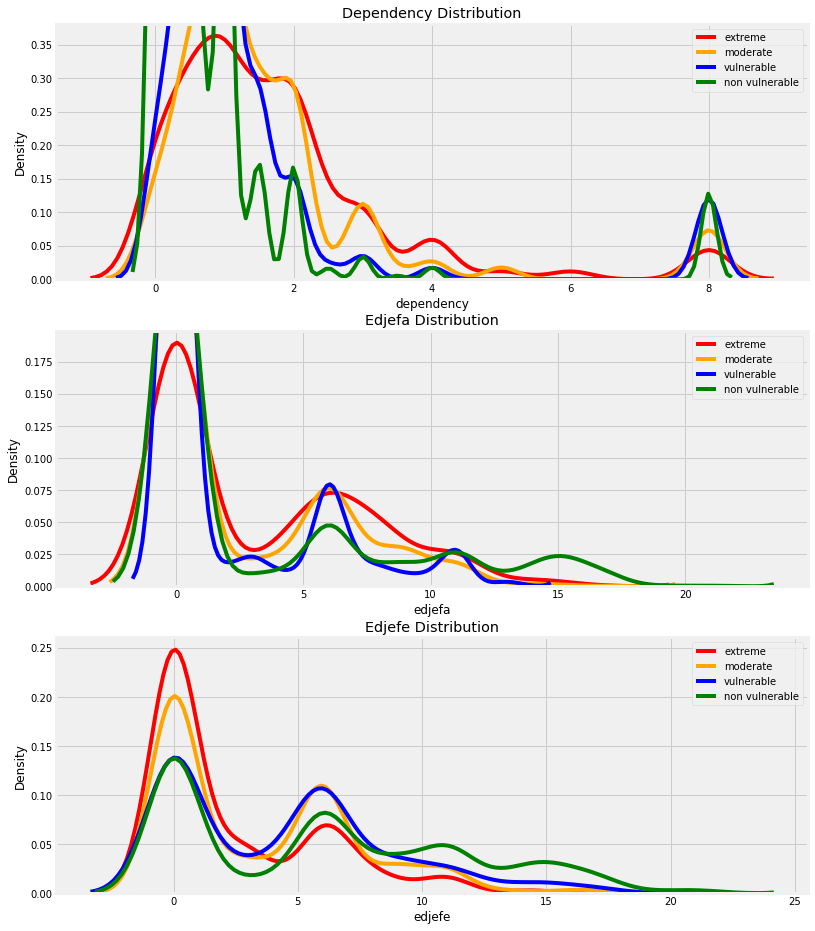

In [9]:
fig = plt.figure(figsize=(12,16))
for i,col in enumerate(['dependency','edjefa','edjefe']):
    ax = plt.subplot(3,1,i+1)
    for poverty_level,color in colors.items():
        sns.kdeplot(df_train.loc[df_train['Target']==poverty_level,col].dropna(),ax=ax,color=color,label=poverty_mapping[poverty_level])
        plt.title("{0} Distribution".format(col.capitalize()));
        plt.xlabel(col);
        plt.ylabel('Density')     
#plt.subplots_adjust(top = 2)
plt.show()

### <font color="#135589">Missing Value Treatment</font> 

In [11]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})
missing['percent'] = missing['total'] / len(data)
missing = missing[missing['total']>0]
missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077


### <font color="#135589">Label Correction</font> 

In this dataset individuals of same household are assigned to different poverty levels. It is being told that the head of the houehold should be considered as the true poverty level. But again there are few households where there is not head of household.

In [37]:
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
not_equal = all_equal[all_equal!=True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


# <font color="#2086BA">3. Data Exploration</font>

### <font color="#135589">Label Exploration</font> 

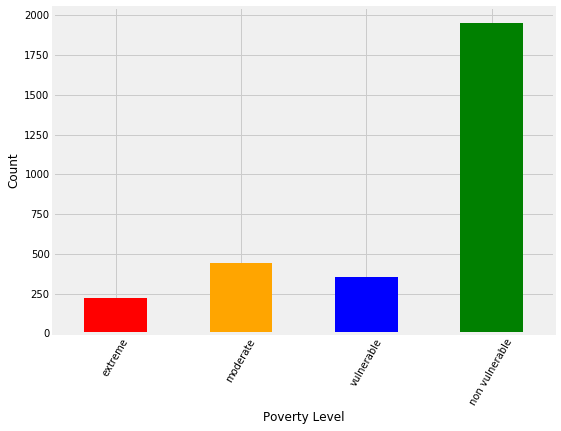

In [26]:
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1']==1),['Target','idhogar']]
label_counts = train_labels['Target'].value_counts().sort_index()
label_counts.plot.bar(figsize=(8,6),color=colors.values())
plt.xlabel('Poverty Level');
plt.ylabel('Count');
plt.xticks([x-1 for x in poverty_mapping.keys()],list(poverty_mapping.values()),rotation = 60)
plt.show()